# Diabetes Data Analysis Project
**Author:** Gift Ike

**Objective:** Explore and analyze factors associated with diabetes and uncover patterns by health, demographics and lifestyle factors in a dataset

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load dataset into dataframe
df = pd.read_csv("Downloads/diabetes_data.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Data Dictionary

- **Diabetes_012:**  0 = No diabetes  1 = Prediabetes  2 = Diabetes
- **HighBP** = 1 for high blood pressure
- **HighChol** = 1 for high cholesterol
- **CholCheck** = 1 if cholesterol check done
- **BMI** = Body Mass Index
- **Smoker** = 1 if smoked 100+ cigarettes
- **Stroke** = 1 if had stroke
- **HeartDiseaseorAttack** = 1 if had any coronary event
- **PhysActivity** = 1 if had physical activity in past 30 days
- **Fruits/Veggies** = 1 if consume them daily
- **HvyAlcoholConsump** = 1 if heavy drinker
- **AnyHealthcare** = 1 if has healthcare access
- **NoDocbcCost** = 1 if didn’t see doctor due to cost
- **GenHlth** = 1-5 (1=Excellent, 5=Poor)
- **MentHlth/PhysHlth** = Number of unhealth days in past 30 days
- **DiffWalk** = 1 if there is difficulty walking
- **Sex:** 0=Female, 1=Male
- **Age** = 1-13 (increasing age group)
- **Education** = 1-6 (increasing level of education)
- **Income** = 1-8 (increasing income brackets)

In [3]:
#Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
#Checking for null values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Can't check for duplicates in this dataset because there is no column with a unique value

**Exploratory Data Analysis (EDA)**
This section explores the relationship between various health, lifestyle, and demographic factors in individuals with and without diabetes. The goal is to identify patterns and potential risk indicators.

**1. Analysis of Risk Factors by Diabetes Status**:
Comparative analysis of key health-related variables among diabetic and non-diabetic individuals:

(i). Body Mass Index (BMI)
(ii). High Blood Pressure
(iii). High Cholesterol
(iv). Smoking History
(v). Alcohol Consumption
(vi). Physical Activity
(vii). General Health (Self reported)

**2. Lifestyle Factors and Diabetes**:
Assessment of daily lifestyle choices such as:

(i). Fruit and Vegetable Consumption
(ii). Physical activity levels


**3. Diabetes-related Health Complications**:
Investigation of common complications or comorbidities associated with diabetes, including:

(i). Stroke
(ii). Heart Disease or Heart Attack
(iii).Walking Difficulties


**4. Age and Sex Distribution**:
Analyzing how diabetes prevalence varies across age groups and gender.

**5. Socioeconomic  Analysis**:
Understanding the distribution of diabetes across different income level groups

Most columns in this dataset are already coded. There is need to convert some columns to readable labels for easy visualization

In [5]:
#Data Cleaning for easy handling
#Binary classifaction for diabetes; Diabetes (1 and 2) vs No diabetes (0)
df['Diabetes_Status'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)

#convert codes for Diabetes Status into readable labels (for visualizations)
df['Diabetes_Status'] = df['Diabetes_Status'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

#convert codes for sex into readable labels (for visualizations)
df['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'})

#convert codes for age and income into readable labels (for visualization)
# Define the age group mapping
age_labels = {
    1: '18–24',
    2: '25–29',
    3: '30–34',
    4: '35–39',
    5: '40–44',
    6: '45–49',
    7: '50–54',
    8: '55–59',
    9: '60–64',
    10: '65–69',
    11: '70–74',
    12: '75–79',
    13: '80+'
}

# Apply the mapping to create a new column
df['Age_Group'] = df['Age'].map(age_labels)

# Define the income mapping
income_map = {
    1: '< $10,000',
    2: '$10,000–$15,000',
    3: '$15,000–$20,000',
    4: '$20,000–$25,000',
    5: '$25,000–$35,000',
    6: '$35,000–$50,000',
    7: '$50,000–$75,000',
    8: '$75,000+'
}

# Apply the mapping to create a new column
df['Income_Level'] = df['Income'].map(income_map)


**1. Analysis of Risk Factors by Diabetes Status**:
Comparative analysis of key health-related variables among diabetic and non-diabetic individuals:

(i). Body Mass Index (BMI)
(ii). High Blood Pressure
(iii). High Cholesterol
(iv). Smoking History
(v). Alcohol Consumption
(vi). Physical Activity
(vii). General Health (Self reported)

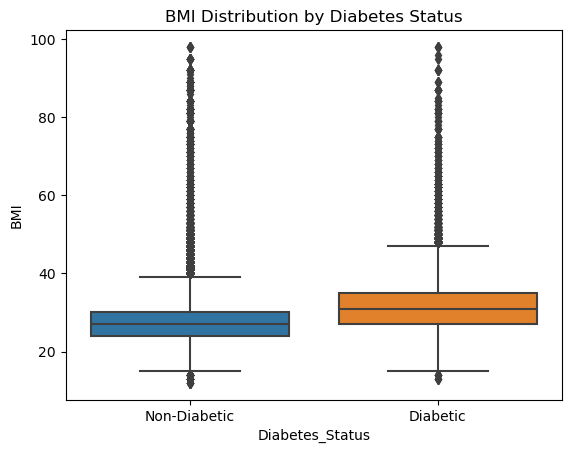

In [6]:
#Visualizing BMI distribution by Diabetes Status
sns.boxplot(data = df, x ='Diabetes_Status', y = 'BMI')
plt.title('BMI Distribution by Diabetes Status')
plt.show()

**Insights**
The boxplot comparing BMI across diabetic and non-diabetic individuals reveals that diabetics tend to have a higher median BMI. While both groups show a similar range and distribution, the diabetic group has a slightly wider interquartile range, indicating more variability in BMI. This pattern supports the established link between higher body mass and the likelihood of developing diabetes.

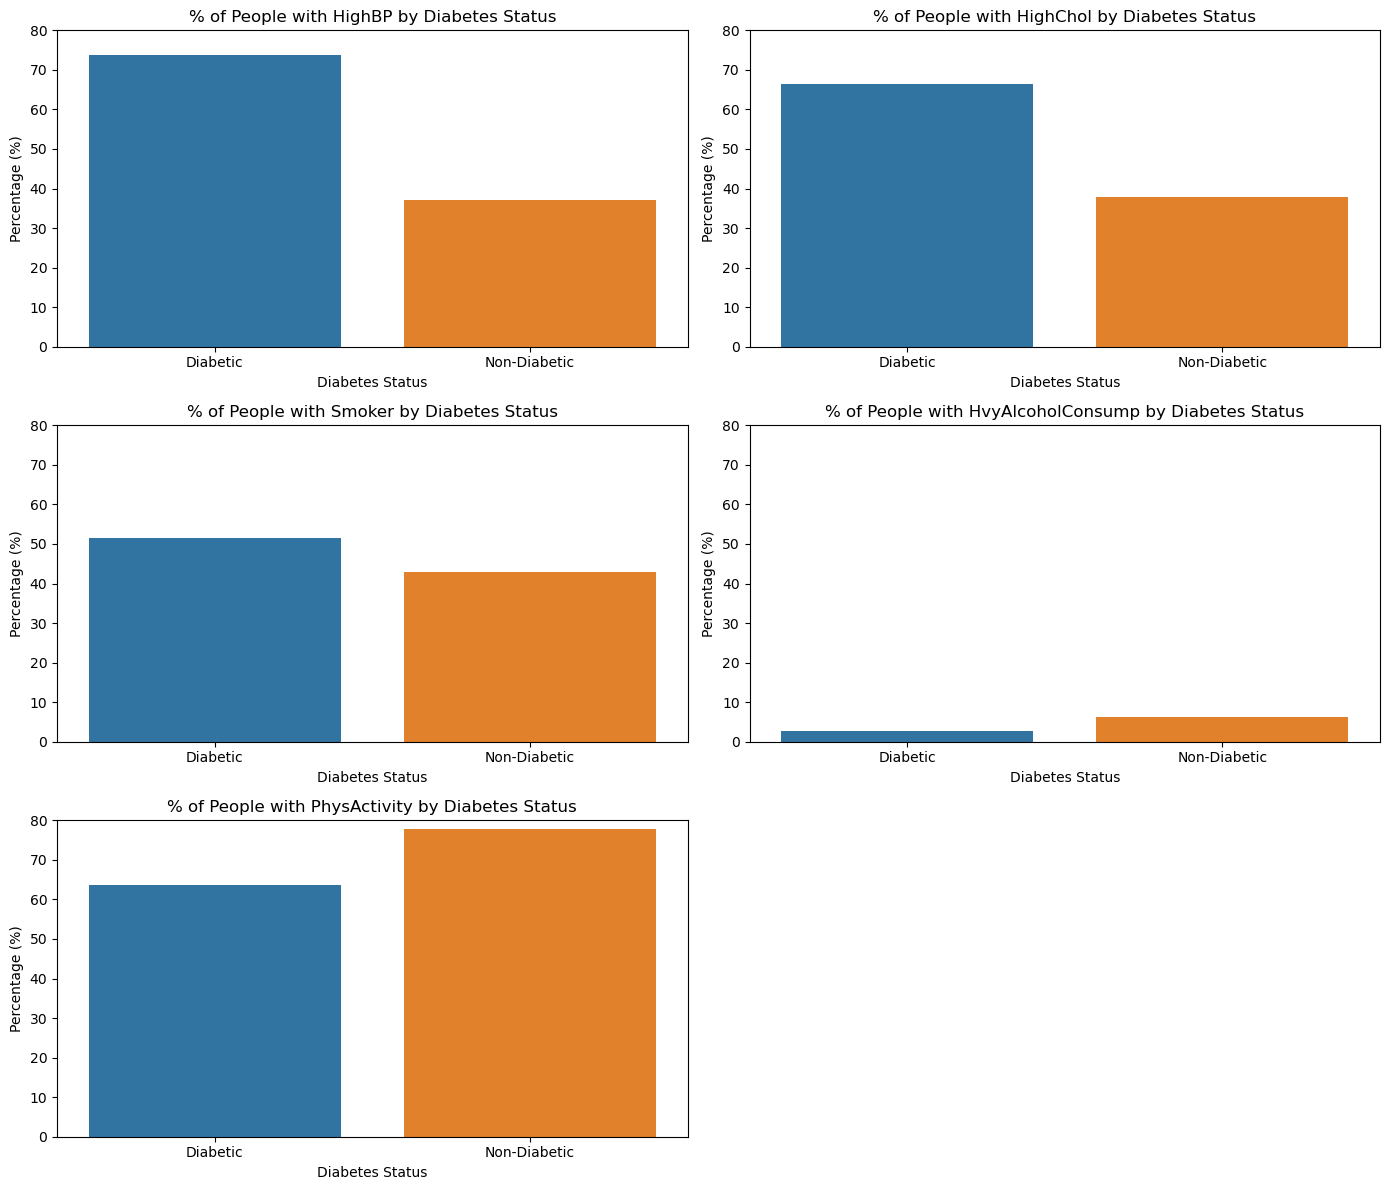

In [10]:
# Using barplots to compare risk factors by diabetes status
factors = ['HighBP', 'HighChol', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity']

# Setting visualizations for each factor in 2 columns
# Set number of columns
cols = 2
rows = (len(factors) + 1) // cols

# Set up the subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 4 * rows))
axes = axes.flatten()

# Loop through factors
for i, factor in enumerate(factors):
    # Calculate percentage of 'Yes' (1) within each diabetic group
    percent_data = df.groupby('Diabetes_Status')[factor].mean() * 100
    percent_data = percent_data.reset_index()
    
    #visualization of each factor
    sns.barplot(data = percent_data, x = 'Diabetes_Status', y = factor, ax=axes[i])
    axes[i].set_title(f'% of People with {factor} by Diabetes Status')
    axes[i].set_xlabel('Diabetes Status')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_ylim(0, 80)  

# Remove extra axes if number of features is odd
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Insights: Risk Factors by Diabetes Status**
The visualizations compare the percentage of individuals with certain risk factors between diabetic and non-diabetic groups. The key takeaways are:

**1. High Blood Pressure (HighBP)**:

Over 70% of diabetic individuals have high blood pressure compared to approximately 38% of non-diabetics.

This suggests a strong association between high blood pressure and diabetes.

**2. High Cholesterol (HighChol)**:

Almost 70% of diabetics reported high cholesterol levels, in contrast to about 40% of non-diabetics.

High cholesterol appears to be significantly more prevalent among diabetics.

**3. Smoking History**:

More than 50% of diabetic individuals reported being smokers, compared to about 42% of non-diabetics.

While the difference is modest, smoking still shows a higher prevalence in the diabetic population.

**4. Heavy Alcohol Consumption (HvyAlcoholConsump)**:

Interestingly, heavy alcohol consumption is lower among diabetics (around 2%) than non-diabetics (around 6%).

This could suggest lower overall alcohol use among diabetic individuals.

**5. Physical Activity Level**

Approximately 80% of non-diabetic individuals reported engaging in physical activity, compared to only about 60% of diabetics.

This indicates that physical inactivity may be a contributing factor to diabetes risk, and highlights the potential protective role of regular physical activity in preventing diabetes.


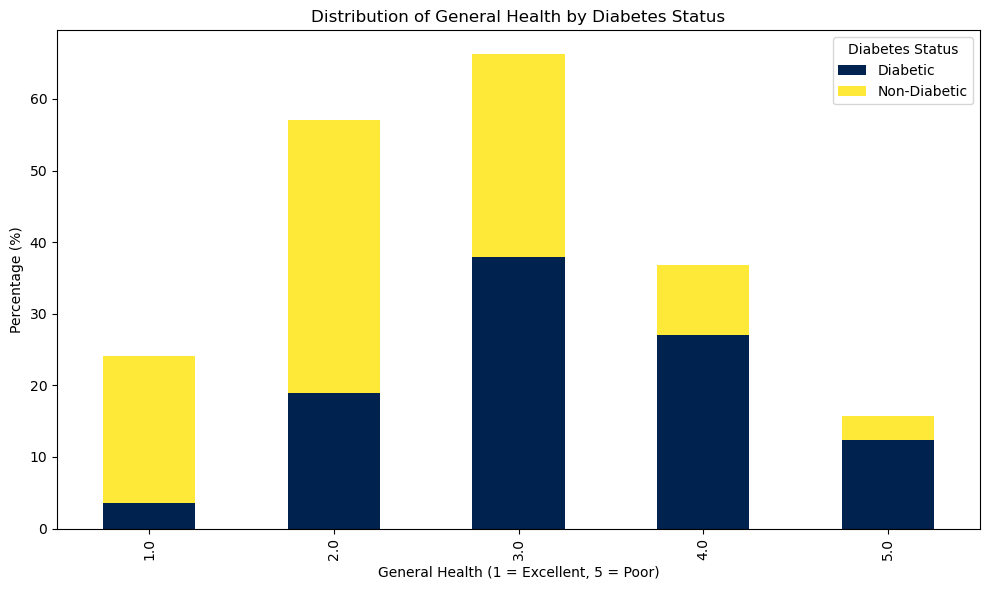

In [9]:
#Comaparing self reported general health by diabetes status
# Create a percent distribution of General Health by diabetes status
genhlth_dist = pd.crosstab(df['GenHlth'], df['Diabetes_Status'], normalize='columns') * 100

# Plot as stacked bar chart
genhlth_dist.plot(kind='bar', stacked=True, figsize=(10,6), colormap='cividis')
plt.title('Distribution of General Health by Diabetes Status')
plt.ylabel('Percentage (%)')
plt.xlabel('General Health (1 = Excellent, 5 = Poor)')
plt.legend(title='Diabetes Status', labels=['Diabetic', 'Non-Diabetic'])
plt.tight_layout()
plt.show()

**Insight:General Health by Diabetes Status**
This stacked bar chart shows how individuals rated their general health on a scale of 1 (Excellent) to 5 (Poor), comparing diabetic and non-diabetic populations.

A higher percentage of non-diabetic individuals rated their general health as excellent (1) or very good (2).
For example, nearly 38% of non-diabetics rated their health as “very good”, compared to a smaller portion of diabetics.

In contrast, diabetic individuals are more concentrated in the lower health ratings:
A significantly higher share of diabetics reported “fair” (4) and “poor” (5) general health.

Specifically, the “poor” health category is mostly dominated by diabetics, highlighting the overall health burden associated with diabetes.

There is a clear trend showing that individuals with diabetes are more likely to report worse general health compared to those without diabetes. 

**2. Lifestyle Factors and Diabetes**:
Assessment of daily lifestyle choices such as:

(i). Fruit and Vegetable Consumption
(ii). Physical activity levels

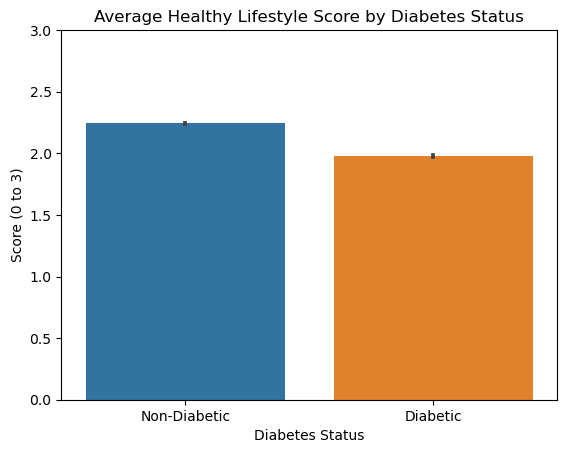

In [11]:
#creating a healthy lifestyle score 
df['healthy_lifestyle_score'] = df['PhysActivity'] + df['Fruits'] + df['Veggies']

#visualization (barplot)
sns.barplot(data = df, x='Diabetes_Status', y = 'healthy_lifestyle_score')
plt.title('Average Healthy Lifestyle Score by Diabetes Status')
plt.ylabel('Score (0 to 3)')
plt.xlabel('Diabetes Status')
plt.ylim(0, 3)
plt.show()

**Insights**:While the difference is modest, this indicates that non-diabetics tend to maintain slightly healthier lifestyle behaviors on average. Promoting better daily health habits may play a role in diabetes prevention and long-term health outcomes.

**3. Diabetes-related Health Complications**:
Investigation of common complications or comorbidities associated with diabetes, including:

(i). Stroke
(ii). Heart Disease or Heart Attack
(iii).Walking Difficulties

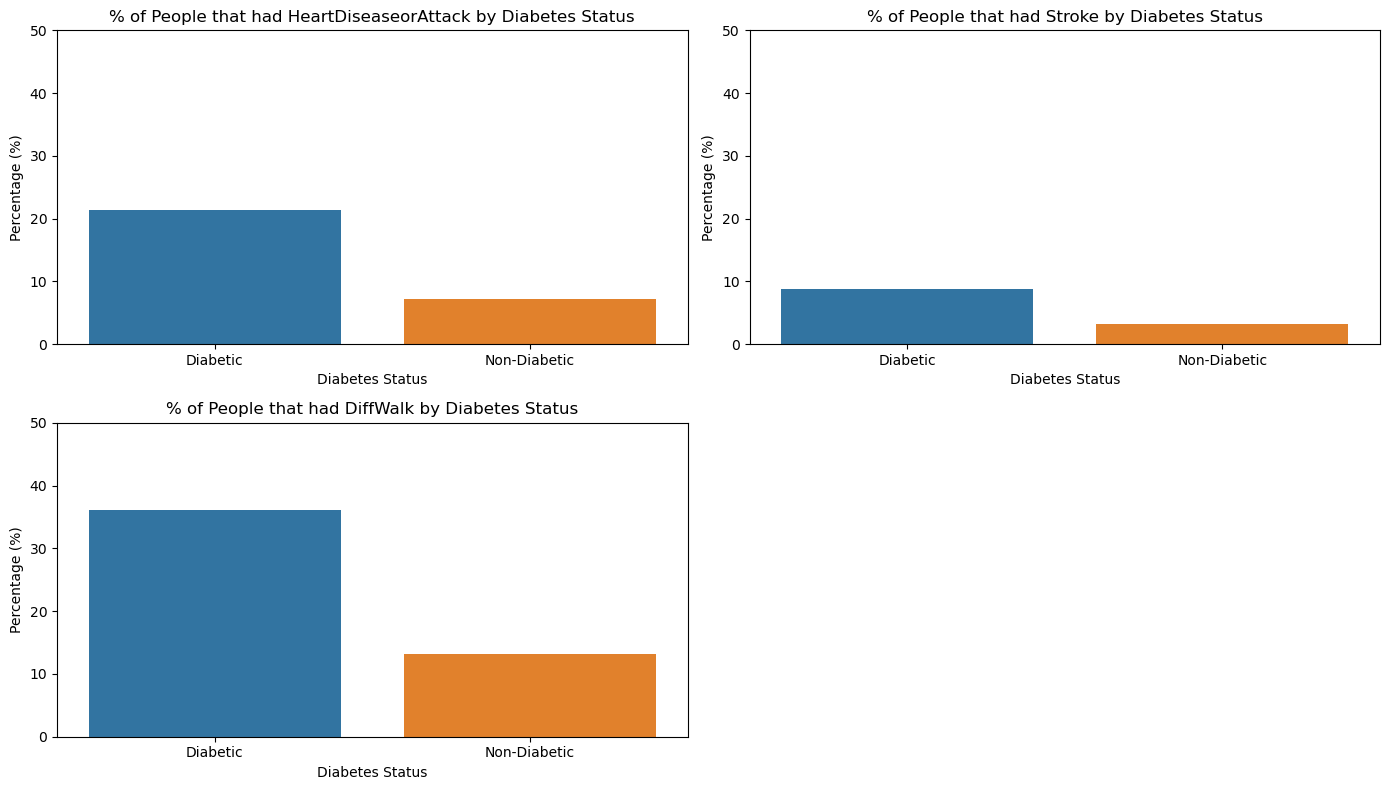

In [12]:
# Selecting relevant columns
complications = ['HeartDiseaseorAttack', 'Stroke', 'DiffWalk' ]

# Making visualization more presentable
# Set number of columns
cols = 2
rows = (len(complications) + 1) // cols

# Set up the subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 4 * rows))
axes = axes.flatten()

# Loop through features
for i, feature in enumerate(complications):
    # Calculate percentage of 'Yes' (1) within each diabetic group
    percent_data = df.groupby('Diabetes_Status')[feature].mean() * 100
    percent_data = percent_data.reset_index()

    #visualization for each feature
    sns.barplot(data = percent_data, x = 'Diabetes_Status', y = feature, ax = axes[i])
    axes[i].set_title(f'% of People that had {feature} by Diabetes Status')
    axes[i].set_xlabel('Diabetes Status')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_ylim(0, 50)  # Ensure consistent scale

# Remove extra axes if number of features is odd
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight: Diabetes and Associated Health Complications**
This visualization highlights the prevalence of serious health complications—heart disease/attack, stroke, and walking difficulties—among individuals based on their diabetes status.

**Observations:**

**Heart Disease or Heart Attack:**
Over 20% of diabetic individuals reported having heart-related issues, compared to about 8% of non-diabetics.

Implication: Diabetics are roughly 3 times more likely to experience cardiovascular complications.

**Stroke:**
About 9% of diabetics reported a history of stroke, versus 3% among non-diabetics.

The risk of stroke appears to be significantly higher in the diabetic population.

**Difficulty Walking:**
Over 35% of diabetics reported difficulty walking, compared to approximately 15% of non-diabetics.
Mobility challenges are substantially more prevalent in diabetic individuals, potentially indicating issues related to nerve damage or circulation.


These findings reinforce that diabetes is strongly associated with higher risks of major health complications, underlining the importance of early detection and lifestyle interventions to manage or prevent such outcomes.


**4. Age and Sex Distribution**:
Analyzing how diabetes prevalence varies across age groups and gender.

In [15]:
# Filter only diabetic individuals
diabetics = df[df['Diabetes_Status'] == 'Diabetic']


In [16]:
# Count diabetics by age group and sex
grouped_data = diabetics.groupby(['Age_Group', 'Sex']).size().reset_index(name='Count')

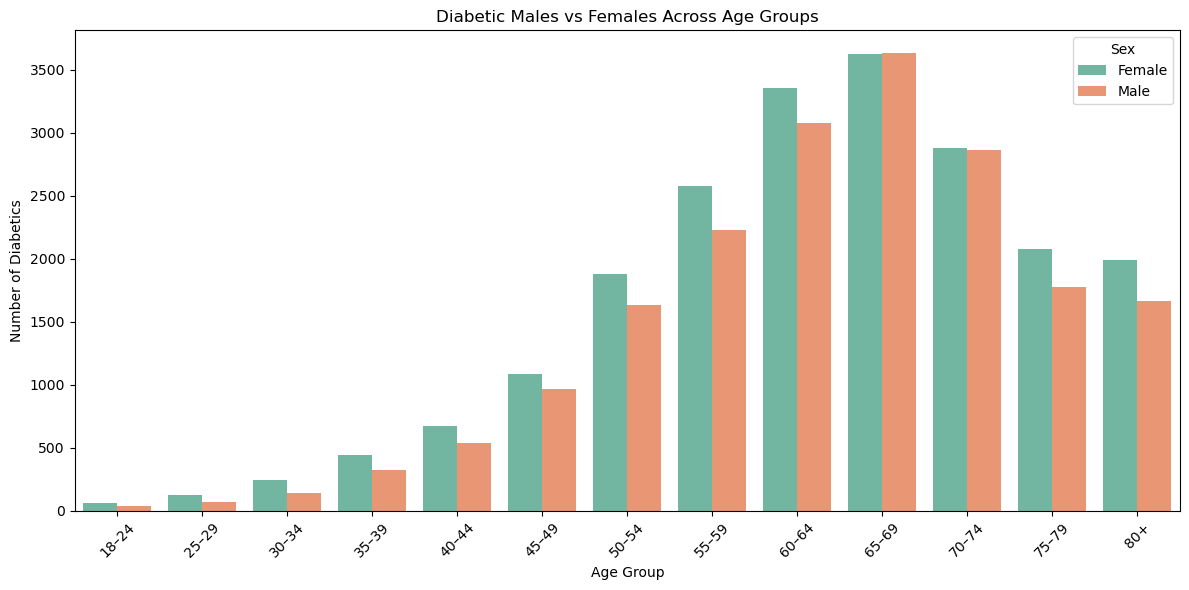

In [18]:
#Visualization for age and sex distribution among diabetic individuals
plt.figure(figsize=(12, 6))
sns.barplot(data =grouped_data, x = 'Age_Group', y = 'Count', hue = 'Sex', palette = 'Set2')

plt.title('Diabetic Males vs Females Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Diabetics')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

**Insights:** The bar plot comparing diabetic cases across age groups by sex reveals a notable trend: females consistently exhibit a higher number of diabetes cases than males across nearly all age brackets. This pattern suggests that women may either be more susceptible to diabetes or more likely to seek medical diagnosis and care.

However, an exception is observed in the 65–69 age group, where males slightly outnumber females in diabetic count. This deviation could hint at gender-specific risk factors or lifestyle differences that become more prominent with aging.

**5. Socioeconomic  Analysis**:
Understanding the distribution of diabetes across different income level groups

In [19]:
# Count how many diabetics are in each income group
income_group_total = diabetics['Income_Level'].value_counts().sort_index(ascending = True)
income_group_total

Income_Level
$10,000–$15,000    3442
$15,000–$20,000    3989
$20,000–$25,000    4513
$25,000–$35,000    5091
$35,000–$50,000    6039
$50,000–$75,000    6000
$75,000+           8206
< $10,000          2697
Name: count, dtype: int64

"< $10,000" keeps on appearing last in the order. Income level column needs to be arranged 

In [20]:
# Safely create a separate DataFrame for diabetics
diabetic = df[df['Diabetes_Status'] == 'Diabetic'].copy()

# Set 'Income_Level' as an ordered categorical column
income_order = ['< $10,000', '$10,000–$15,000', '$15,000–$20,000',
                '$20,000–$25,000', '$25,000–$35,000', '$35,000–$50,000',
                '$50,000–$75,000', '$75,000+']

diabetic['Income_Level'] = pd.Categorical(diabetic['Income_Level'], categories=income_order, ordered=True)

# Get the sorted counts safely
income_group_total = diabetic['Income_Level'].value_counts(sort=False, dropna=False)
income_group_total

Income_Level
< $10,000          2697
$10,000–$15,000    3442
$15,000–$20,000    3989
$20,000–$25,000    4513
$25,000–$35,000    5091
$35,000–$50,000    6039
$50,000–$75,000    6000
$75,000+           8206
Name: count, dtype: int64

In [21]:
# Calculate percentage of total diabetics in each income group
income_group_prevalence = (income_group_total / diabetics.shape[0]) * 100
income_group_prevalence 

# Convert to DataFrame for display
income_group_prevalence_df = income_group_prevalence.reset_index()
income_group_prevalence_df.columns = ['Income Level', 'Prevalence%']

C:\Users\Nsiegbe\anaconda4\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


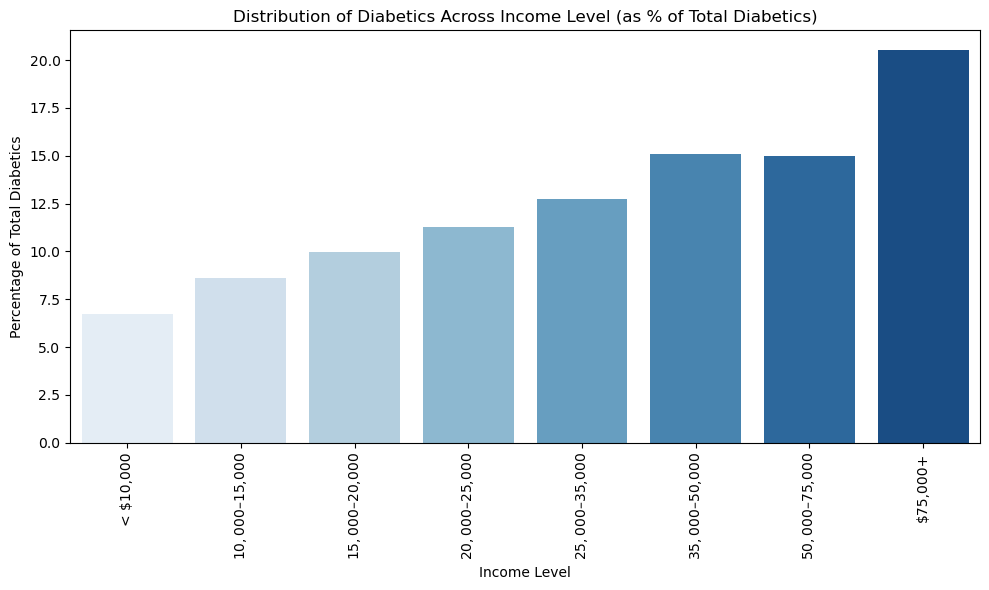

In [22]:
#Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Level', y='Prevalence%', data = income_group_prevalence_df, palette='Blues')

plt.title('Distribution of Diabetics Across Income Level (as % of Total Diabetics)')
plt.xlabel('Income Level')
plt.ylabel('Percentage of Total Diabetics')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Insights:** The highest number of diabetic cases appears in the highest income groups, suggesting that factors beyond income alone—such as lifestyle, dietary patterns, stress, or healthcare access—may be influencing this trend.


While lower income is often associated with poorer health outcomes, this dataset suggests that diabetes risk may also be elevated in higher-income populations, possibly due to sedentary lifestyles, processed food consumption, or age distribution differences. Further exploration into associated lifestyle behaviors is warranted.

In [23]:
# Export dataframe to csv for visualization in Power BI
df.to_csv(r'C:\Users\Nsiegbe\Downloads\Cleaned_diabetes_data.csv', index = False)

## Final Key Insights

- **General Health**: Diabetic individuals report significantly poorer general health compared to non-diabetics.
- **Lifestyle Factors**: Diabetics show slightly lower healthy lifestyle scores, with reduced physical activity and fruit/vegetable intake.
- **Risk Indicators**: High blood pressure, high cholesterol, higher BMI and low physical activity are more prevalent among diabetic individuals.
- **Diabetes Complications**: Diabetics face higher rates of heart disease, stroke, and mobility difficulties.
- **Age & Gender Trends**: Diabetes is more common in older age groups. Females show higher prevalence in most age categories, except ages 65–69.
- **Income**: A higher number of diabetic cases appear in upper income groups.

---

## Recommendations

- **Encourage Healthy Living**: Promote physical activity and healthy diets, especially in high-risk groups like older individuals and women.
- **Increase Preventive Screenings**: Emphasize routine health checks for early detection and risk management.
- **Gender-Focused Interventions**: Tailor awareness and support programs considering that women may be disproportionately affected across most age groups.
- **Investigate Income Disparities**: Further explore why higher-income groups report more diabetes cases to better inform intervention strategies.

---

